In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data for test.csv
fraud = pd.read_csv("fraudTest.csv")
fraud.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [4]:
# Read data for train.csv
fraudT = pd.read_csv("fraudTrain.csv")
fraudT.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
# Shape for test data
fraud.shape

(555719, 23)

In [6]:
# Shape for train data
fraudT.shape

(1048575, 23)

In [7]:
# Describe for test data
fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178627e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309920e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800000e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.520000e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.640000e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.990000e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
# Describe for train data
fraudT.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# Info for test data
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# Info for train data
fraudT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [11]:
# For test data
fraud.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
fraud.isnull().mean()*100

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [13]:
# For train data
fraudT.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
fraudT.isnull().mean()*100

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

### We observe that this dataset has no null values that is great so there is no need to treat null value.

In [15]:
# For test data
fraud.tail(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555716,555716,31/12/2020 23:59,6.010000e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.080000e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,31/12/2020 23:59,4.170000e+15,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,10/05/1993,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [16]:
# For train data
fraudT.tail(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1048572,1048572,10/03/2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,...,38.2507,-85.7476,736284,Engineering geologist,02/04/1952,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1048573,1048573,10/03/2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,...,40.7320,-73.1000,4056,Film/video editor,25/06/1990,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0
1048574,1048574,10/03/2020 16:08,2.283740e+15,fraud_Buckridge PLC,misc_pos,6.81,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556,Prison officer,27/12/1997,8d0a575fe635bbde12f1a2bffc126731,1362931730,33.601468,-83.891921,0


### As Unnamed column is not useful so we can drop this.

In [17]:
# Drop "unnamed" column from test data
fraud.drop("Unnamed: 0",axis=1,inplace=True)
fraud.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [18]:
# Drop "unnamed" column from train data
fraudT.drop("Unnamed: 0",axis=1,inplace=True)
fraudT.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01/01/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01/01/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [19]:
# Train data
fraudT.groupby(['city'])['amt'].mean().sort_values(ascending=False)[:10]

city
North East       918.425556
Karns City       874.505714
Wappapello       842.231250
Claypool         810.278571
Mount Vernon     778.571818
Irvington        774.743750
La Grande        732.478333
Greenport        732.365000
Mountain City    706.808000
Chattanooga      700.092857
Name: amt, dtype: float64

## Mean amount in cities with fraud

In [20]:
# Train data 
fraudT.groupby(['job'])['amt'].mean().sort_values(ascending=False)[:10]

job
Ship broker                          874.505714
Air traffic controller               774.743750
Engineer, site                       732.478333
Contracting civil engineer           700.092857
Sales promotion account executive    691.478571
Industrial buyer                     680.775000
Dancer                               644.929474
Homeopath                            642.447273
Careers adviser                      625.602000
Veterinary surgeon                   603.951250
Name: amt, dtype: float64

### Work profile in which most fraud committed

<AxesSubplot:xlabel='category'>

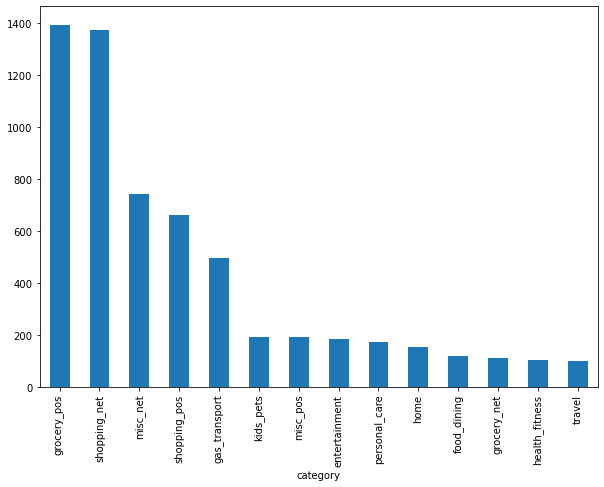

In [21]:
fraudT.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,7))

### grocery_pos and shopping_net are high as compare to other categories.

### Bivariate analysis

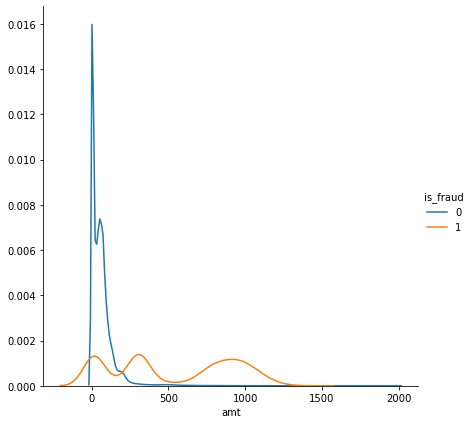

In [22]:
amount = fraudT.loc[fraudT['amt']<2000]
sns.FacetGrid(amount, hue = "is_fraud",size = 6).map(sns.kdeplot,"amt").add_legend()

In [23]:
fraudT.gender.value_counts()

F    573968
M    474607
Name: gender, dtype: int64

In [24]:
# Converting date for test data
from datetime import datetime as dt
fraud["trans_date_trans_time"] = pd.to_datetime(fraud["trans_date_trans_time"])
fraud["trans_date"] = fraud["trans_date_trans_time"].dt.date
fraud["trans_date"]= pd.to_datetime(fraud["trans_date"])

fraud['year'] = fraud['trans_date'].dt.year
fraud['month'] = fraud['trans_date'].dt.month
fraud['day'] = fraud['trans_date'].dt.day

In [25]:
# Converting date for train data
from datetime import datetime as dt
fraudT["trans_date_trans_time"] = pd.to_datetime(fraudT["trans_date_trans_time"])
fraudT["trans_date"] = fraudT["trans_date_trans_time"].dt.date
fraudT["trans_date"]= pd.to_datetime(fraudT["trans_date"])

fraudT['year'] = fraudT['trans_date'].dt.year
fraudT['month'] = fraudT['trans_date'].dt.month
fraudT['day'] = fraudT['trans_date'].dt.day

In [26]:
# Train data
fraudT["is_fraud"].value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

In [27]:
# Train data
fraudT.groupby("is_fraud")["amt"].mean()

is_fraud
0     67.627445
1    530.573492
Name: amt, dtype: float64

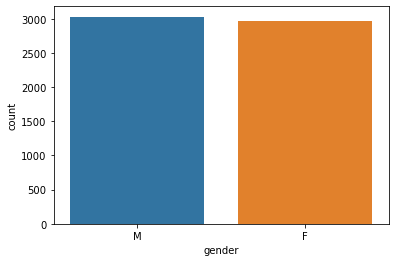

In [28]:
ax=sns.countplot(x="gender",data = fraudT[fraudT["is_fraud"]==1])

### Gender do not show any major difference to fraud transaction.

In [29]:
# Using crosstab for show it to in a table format as pivot table.
pd.crosstab(fraudT["category"],fraudT["is_fraud"],normalize='index')

is_fraud,0,1
category,,
entertainment,0.997565,0.002435
food_dining,0.998366,0.001634
gas_transport,0.995321,0.004679
grocery_net,0.997004,0.002996
grocery_pos,0.986027,0.013973
health_fitness,0.998501,0.001499
home,0.998464,0.001536
kids_pets,0.997878,0.002122
misc_net,0.985474,0.014526


In [30]:
# Check type for train data.
fraudT.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
year                              int64
month                             int64


In [31]:
# Check type for test data.
fraud.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
year                              int64
month                             int64


In [32]:
# concat both train data and test data.
df = pd.concat([fraudT,fraud])  # have to replace total by df done.

In [33]:
df.shape

(1604294, 26)

In [34]:
# Check for any duplicate values.
df.drop_duplicates(inplace=True)

In [35]:
# This dataset does not contain duplicate values.
df.shape

(1604294, 26)

In [36]:
# Check Percentage
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1596143,99.491926
1,1,8151,0.508074


In [37]:
df.gender.value_counts()

F    878854
M    725440
Name: gender, dtype: int64

In [38]:
# Setting Numerial columns 
numerical_col = df.select_dtypes(exclude=['object','datetime64[ns]','category'])
numerical_col.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,month,day
0,2.703190e+15,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,2019,1,1
1,6.304230e+11,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,2019,1,1
2,3.885950e+13,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,2019,1,1
3,3.534090e+15,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,2019,1,1
4,3.755340e+14,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,2019,1,1


In [39]:
cr_numer_col = df [["amt","zip","lat","long","city_pop","unix_time","merch_lat","merch_long","is_fraud"]]
cr_numer_col.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [40]:
# Setting Categorical columns 
categorical_col = df.select_dtypes(exclude=['int64','datetime64[ns]','float'])
categorical_col.head()

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46


In [41]:
fraud_plot = df[["category","gender","is_fraud"]]
fraud_plot.head()

,category,gender,is_fraud
0,misc_net,F,0
1,grocery_pos,F,0
2,entertainment,M,0
3,gas_transport,M,0
4,misc_pos,M,0


In [42]:
#creating new dataframe to analyse data based on category
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

#df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category.head()


,index,Category,category_count,percent
0,2,gas_transport,162800,10.147766
1,4,grocery_pos,152459,9.503183
2,6,home,151923,9.469773
3,12,shopping_pos,144144,8.984887
4,7,kids_pets,140096,8.732564


## Here are the top 5 categories in which fraud transaction is high.

In [43]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,year,month,day
0,2019-01-01,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,2019,1,1
1,2019-01-01,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,2019,1,1


In [44]:
# Transform date and month
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,trans_date,year,month,day,trans_day,trans_month
0,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019-01-01,2019,1,1,Tuesday,January
1,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019-01-01,2019,1,1,Tuesday,January
2,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019-01-01,2019,1,1,Tuesday,January
3,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019-01-01,2019,1,1,Tuesday,January
4,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019-01-01,2019,1,1,Tuesday,January


In [45]:
# Find age 
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0         30.0
1         41.0
2         57.0
3         51.0
4         33.0
          ... 
555714    55.0
555715    21.0
555716    39.0
555717    55.0
555718    27.0
Name: age, Length: 1604294, dtype: float64

In [46]:
# Group according to age.
df['age_group'] = pd.cut(df['age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df['age_group'].value_counts(ascending=False)

40-50         373427
30-40         358843
60 - Above    330288
20-30         264539
50-60         229667
10-20          47530
Name: age_group, dtype: int64

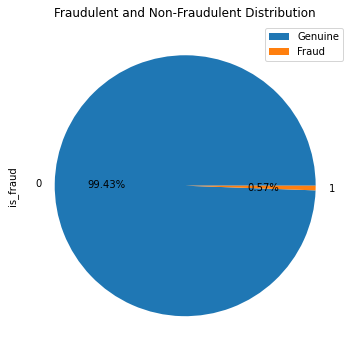

In [47]:
# For train data
round(100*fraudT['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

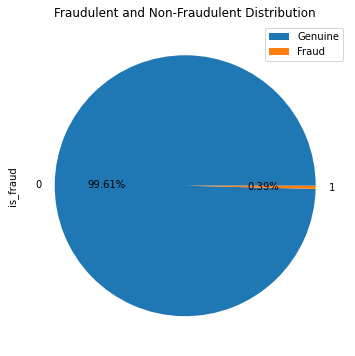

In [48]:
# For test data
round(100*fraud['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

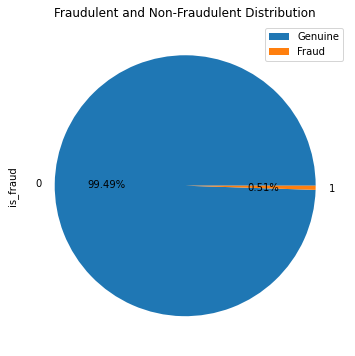

In [49]:
round(100*df['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

## From above graphs we can see how much this data has imbalance.

In [50]:
fraudT = pd.get_dummies(fraudT,columns=['category'],drop_first=True)
fraud = pd.get_dummies(fraud,columns=['category'],drop_first=True)

fraudT.columns = fraudT.columns.str.replace(' ', '')
fraud.columns = fraud.columns.str.replace(' ', '')

train = fraudT.select_dtypes(include='number')
test = fraud.select_dtypes(include='number')

In [51]:
df = pd.concat([train,test])

In [52]:
X = df.drop("is_fraud",axis=1) 
y = df["is_fraud"]

In [53]:
print(sum(y))

8151


In [54]:
X.dtypes

cc_num                     float64
amt                        float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
year                         int64
month                        int64
day                          int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

In [55]:
X = X.drop(['zip','lat','long','unix_time','merch_lat','merch_long'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

print("Score the X-train with Y-train is : ", dtc.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,y_test))

y_pred=dtc.predict(X_test)

print("Accuracy score " , accuracy_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9960959007997274
Accuracy score  0.9960959007997274
F1 score:  99.62 %


In [60]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.66      0.63      2470
           0       1.00      1.00      1.00    478819

    accuracy                           1.00    481289
   macro avg       0.80      0.83      0.82    481289
weighted avg       1.00      1.00      1.00    481289



In [61]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.611


In [62]:
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

F1 score:  99.62 %


In [63]:
df1 = pd.concat([df,fraud],axis=0)
df1.head(2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,first,last,gender,street,city,state,job,dob,trans_num,trans_date
0,2.703190e+15,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,6.304230e+11,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [64]:
# Average number of transaction per month 
avg_tran_per_month = df.shape[0]//24
avg_tran_per_month

66845

In [65]:
# Average number of fraudulent transaction per month 
avg_fraud_tran_per_month = df[df.is_fraud == 1].shape[0]//24
avg_fraud_tran_per_month

339

In [66]:
# Average amount per fraud transaction
avg_fraud_amt = df[df.is_fraud == 1].amt.sum()//df[df.is_fraud == 1].shape[0]
avg_fraud_amt

529.0

In [67]:
cost_before_model = avg_fraud_amt*avg_fraud_tran_per_month
cost_before_model

179331.0